### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#### Fetching the Dataset

In [2]:
housing = fetch_california_housing()

#### Describing the Dataset

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


#### Creating a DataFrame

In [6]:
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Summary of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### Exploratory Data Analysis (EDA)

In [10]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


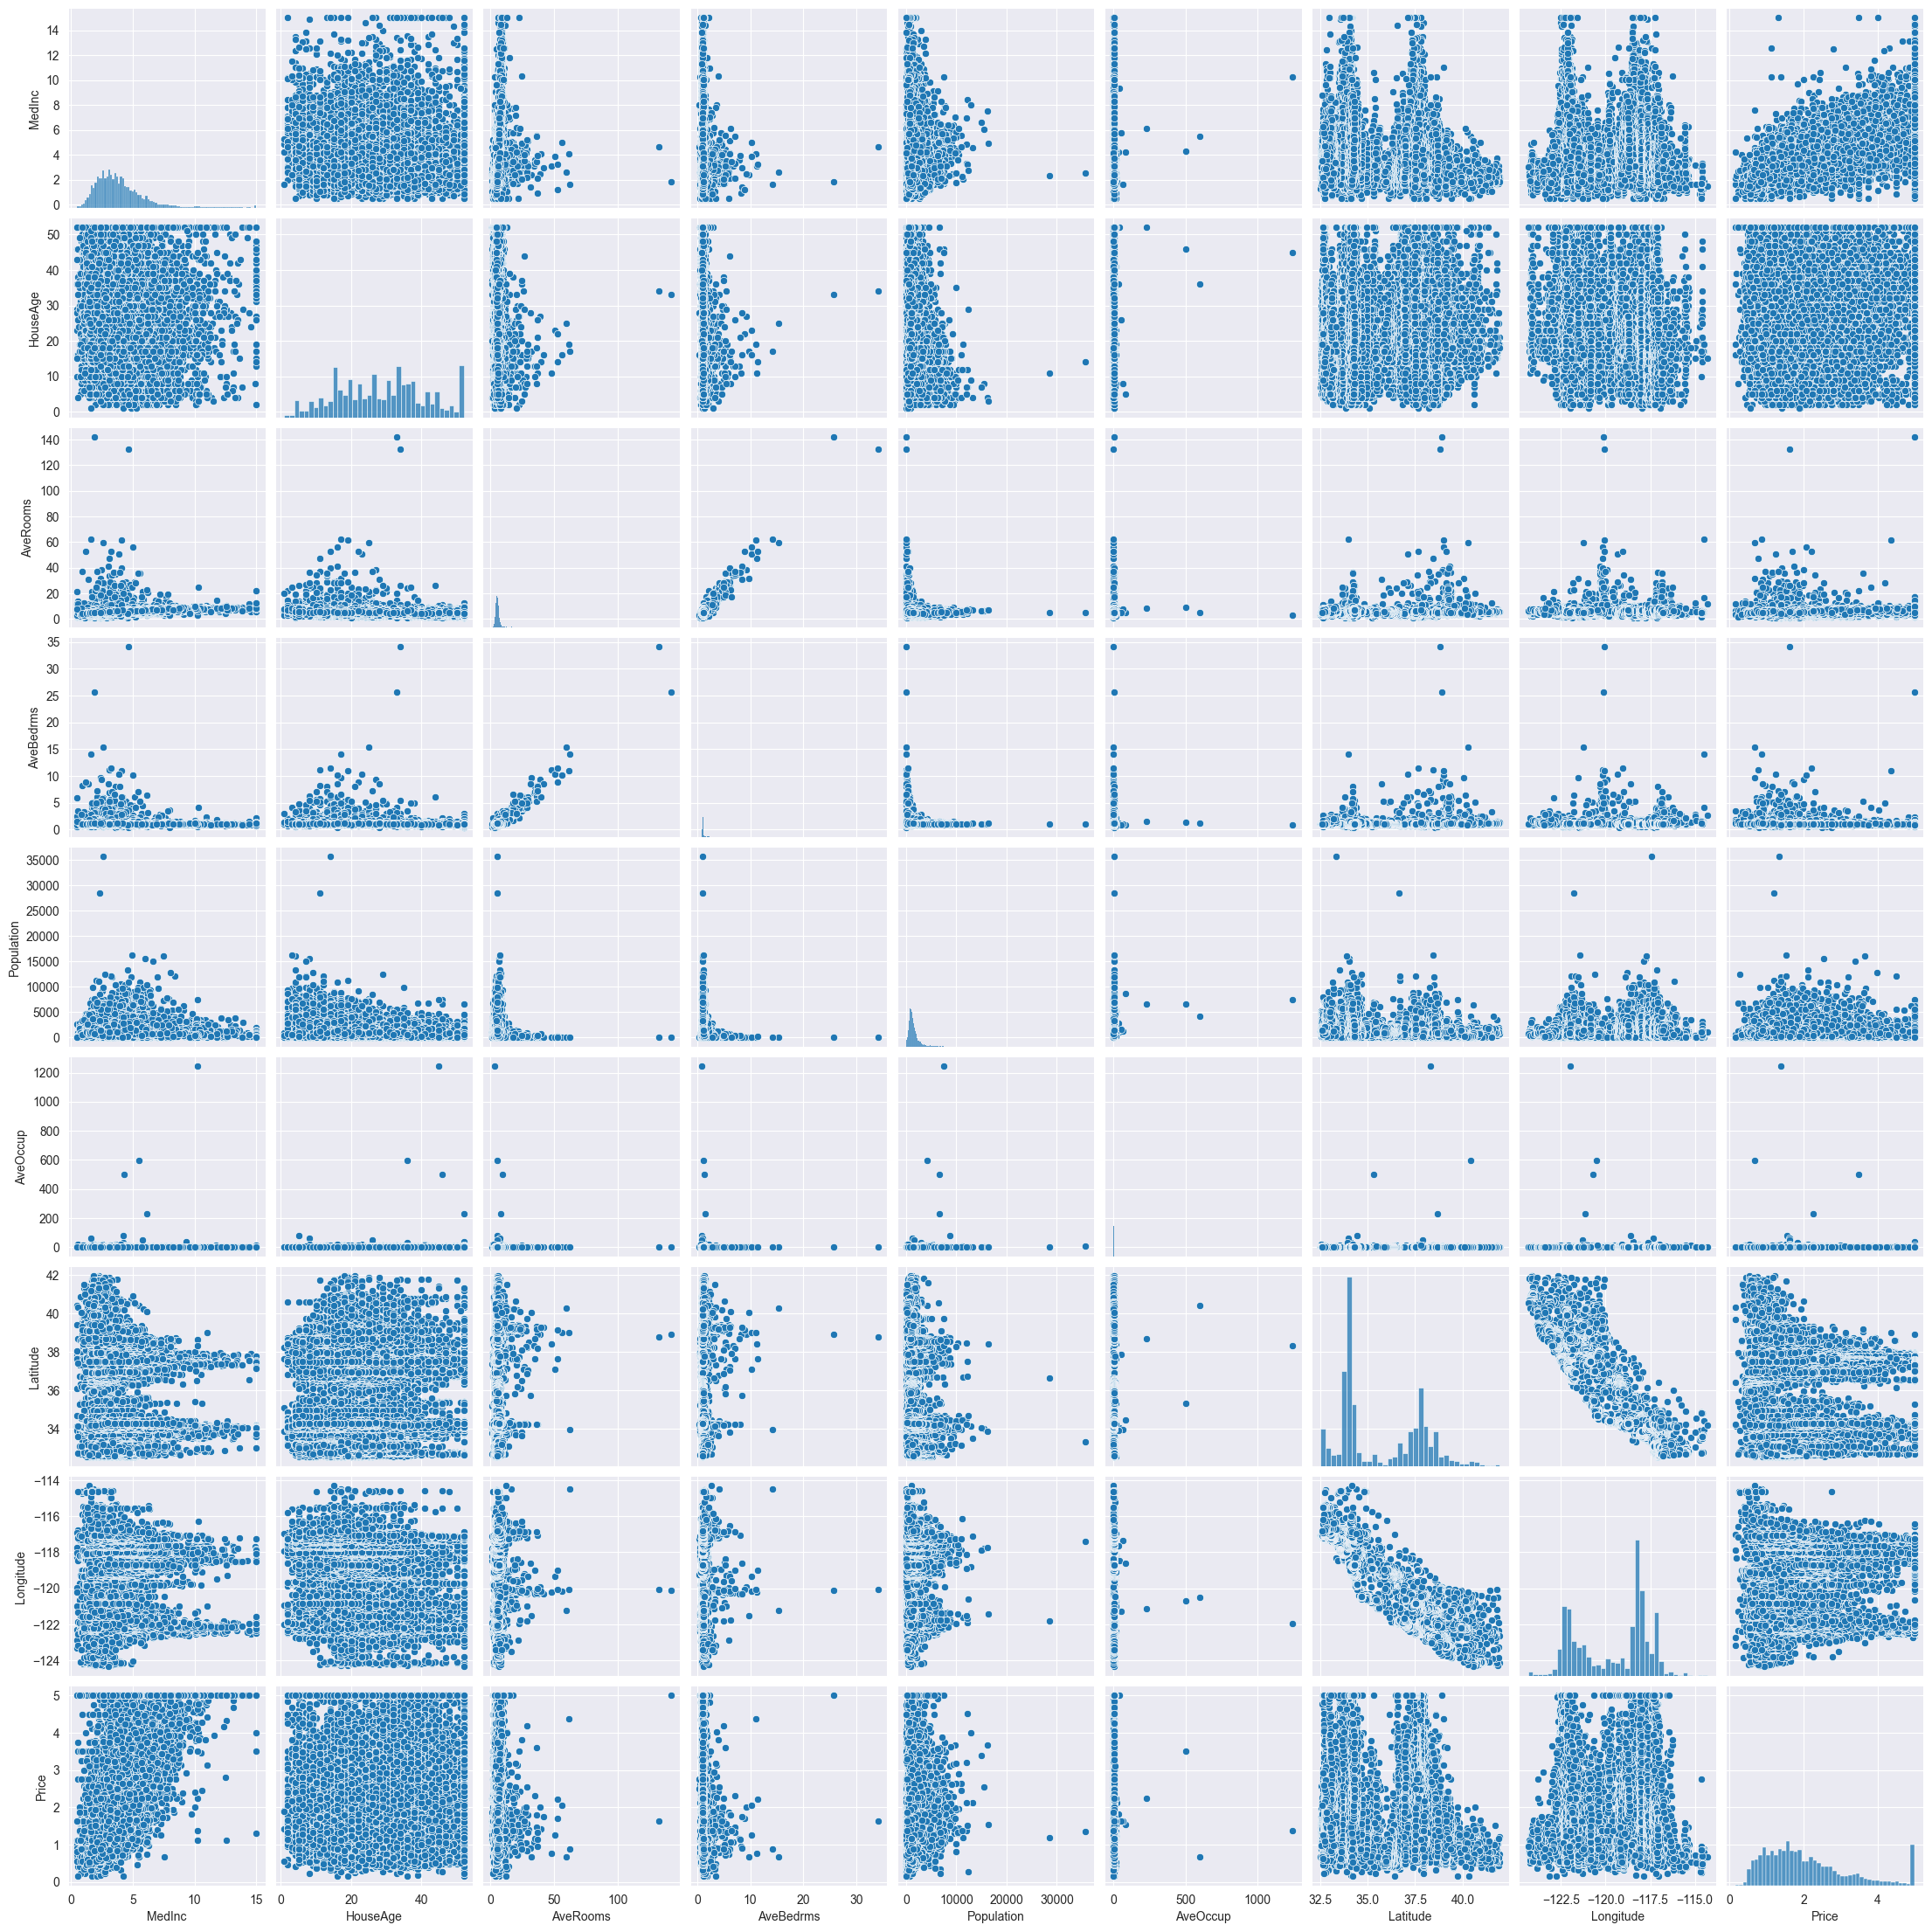

In [11]:
sns.pairplot(df)

### observations
##### * Avg rooms and Avg bedrooms are highly correlated.
##### * we decide to drop Avg bedrooms.

In [12]:
df= df.drop(columns=['AveBedrms'])

### Boxplot for checking the outliers

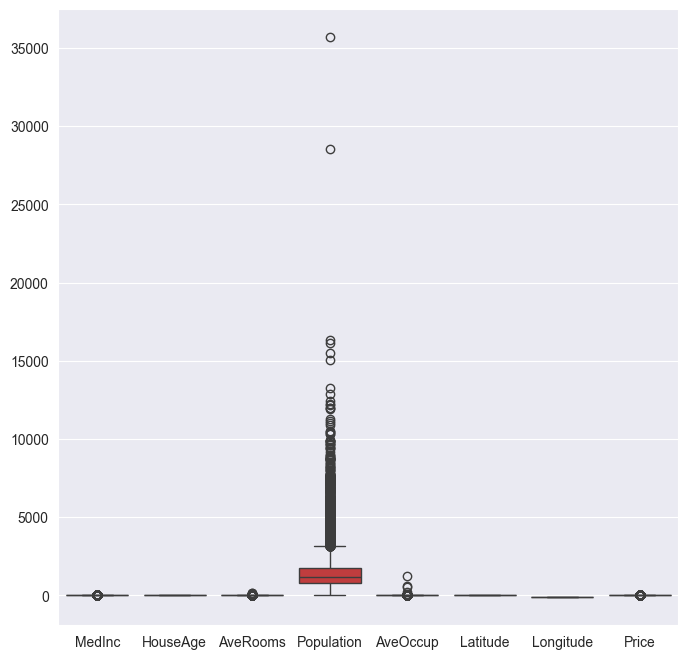

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data =df, ax=ax)
plt.savefig("boxplot.jpg")

#### Treating the outliers

In [14]:
exclude_cols = ['Longitude', 'Latitude']
for col in df.columns:
    if col not in exclude_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))

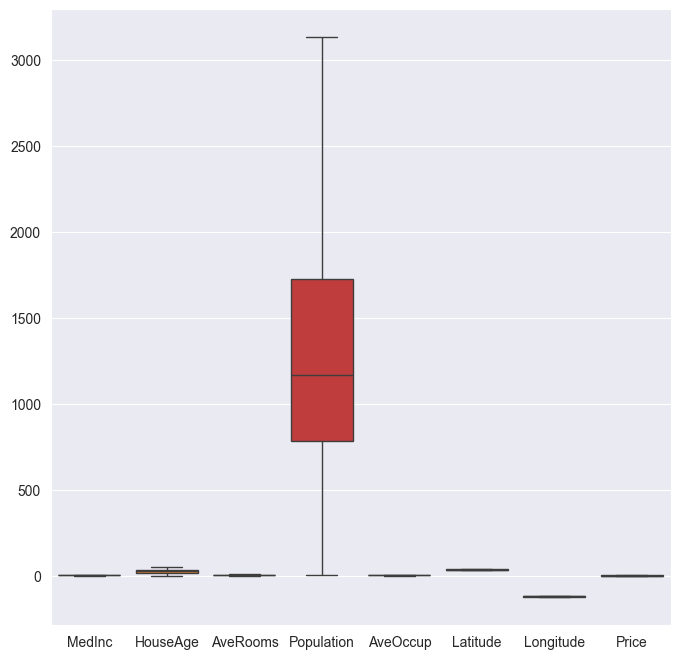

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data =df, ax=ax)
plt.savefig("boxplot2.jpg")

#### Splitting the dataset into features and target variable

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#### Splitting the dataset into training and testing sets

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Normalizing the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)

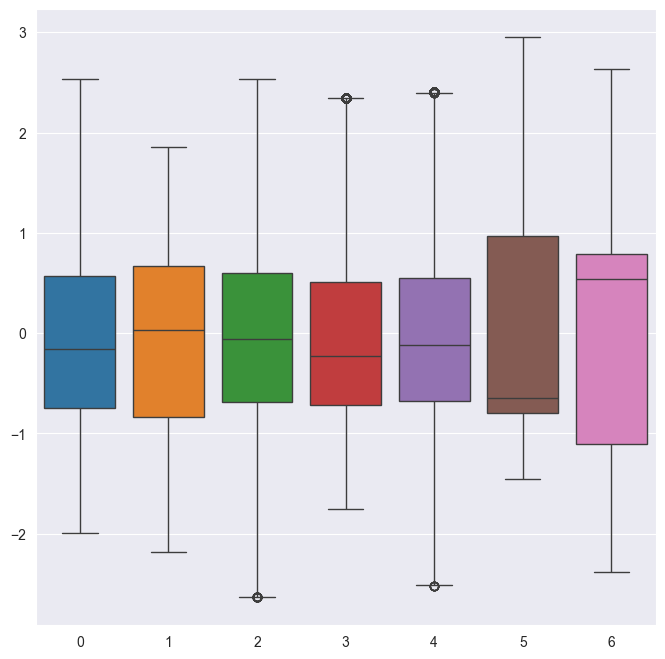

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data =x_train_norm, ax=ax)
plt.savefig("boxplot_normalized.jpg")

In [20]:
x_test_norm = scaler.transform(x_test)

#### Model Training

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_norm, y_train)

LinearRegression()

In [22]:
slope = regression.coef_
intercept = regression.intercept_

In [23]:
slope

array([ 0.72617014,  0.14986789, -0.03936786,  0.04982512, -0.29100342,
       -0.86328525, -0.78219708])

In [24]:
reg_predict=regression.predict(x_test_norm)
reg_predict

array([0.32524363, 1.79236526, 3.12912473, ..., 2.31654361, 1.39372979,
       1.97173786], shape=(6192,))

In [25]:
error= y_test - reg_predict

In [26]:
error

20046    0.151756
3024    -1.334365
15663    1.695000
20484   -0.564185
9814     0.016377
           ...   
17505    0.068688
13512    0.068242
10842   -0.132544
16559   -0.199730
5786     0.126262
Name: Price, Length: 6192, dtype: float64

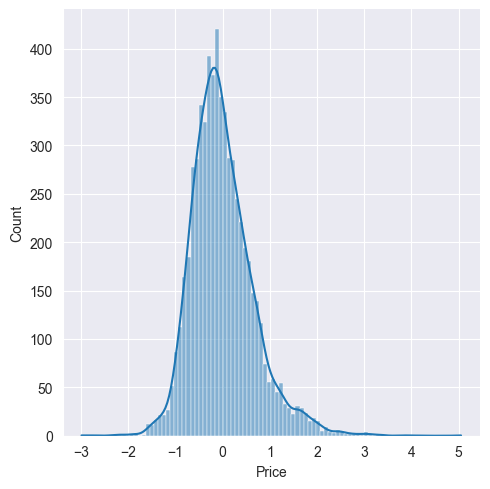

In [27]:
sns.displot(x=error, kde=True)

#### Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
print("Mean Squared Error:", mean_squared_error(y_test, reg_predict))
print("R2 Score:", r2_score(y_test, reg_predict))
print("Mean Absolute Error:", mean_absolute_error(y_test, reg_predict))

Mean Squared Error: 0.4399650286290012
R2 Score: 0.6524223627895529
Mean Absolute Error: 0.5001710317400511


In [30]:
adjusted_r2 = 1 - (1 - r2_score(y_test, reg_predict)) * (len(y_test) - 1) / (len(y_test) - x_test_norm.shape[1] - 1)

In [31]:
adjusted_r2

0.6520289210915462

#### Saving the Model

In [34]:
import pickle
pickle.dump(regression, open('regression.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))


### Loading the Model and Making Predictions

In [35]:
model = pickle.load(open('regression.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
input_values = [3.5, 25.0, 5.0, 1000, 3.0, 34.0, -118.0]  # Example values
input_array = np.array(input_values).reshape(1, -1)
input_scaled = scaler.transform(input_array)
predicted_price = model.predict(input_scaled)

print(f"Predicted House Price: ${predicted_price[0]*100000:.3f}")

Predicted House Price: $187675.532


C:\project\news sum\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
